<h2 align="center">Optimizers in Action with Fashion MNIST Dataset</h2>

In [3]:
import torch
from torch import nn, optim
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

### Load the Dataset

In [4]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [5]:
batch_size=64

train_loader = DataLoader(training_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

for images, labels in train_loader:
    print(images.shape, labels.shape)
    break

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [6]:
labels[0]

tensor(9)

In [7]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

classes[labels[7].item()]

'Pullover'

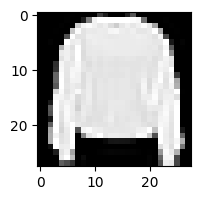

In [8]:
plt.figure(figsize=(2,2))
plt.imshow(images[7].cpu().squeeze(), cmap='gray')
plt.show()

### Build Neural Network

In [9]:
device = ("cuda" if torch.cuda.is_available()
else "mps" if torch.backends.mps.is_available()
else "cpu")
device

'cuda'

In [11]:
class ClothsClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
        
    def forward(self, x):
        return self.network(x)

In [12]:
model = ClothsClassifier().to(device)
loss_fn = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.001)
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [13]:
epochs = 2

model.train()

for epoch in range(epochs):
    for batch, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        pred = model(images)
        loss = loss_fn(pred, labels)
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
        if batch % 100 == 0:
            print(f"Batch: {batch}, Loss: {loss.item()}")

Batch: 0, Loss: 2.3185243606567383
Batch: 100, Loss: 0.8023175597190857
Batch: 200, Loss: 0.4705267548561096
Batch: 300, Loss: 0.6208277940750122
Batch: 400, Loss: 0.5188816785812378
Batch: 500, Loss: 0.4613702893257141
Batch: 600, Loss: 0.43556636571884155
Batch: 700, Loss: 0.5920909643173218
Batch: 800, Loss: 0.5758353471755981
Batch: 900, Loss: 0.48105713725090027
Batch: 0, Loss: 0.30124232172966003
Batch: 100, Loss: 0.4285827875137329
Batch: 200, Loss: 0.31610047817230225
Batch: 300, Loss: 0.43879061937332153
Batch: 400, Loss: 0.36470791697502136
Batch: 500, Loss: 0.3693581223487854
Batch: 600, Loss: 0.36225903034210205
Batch: 700, Loss: 0.5159111022949219
Batch: 800, Loss: 0.48690474033355713
Batch: 900, Loss: 0.45995524525642395


In [14]:
# Testing the model
model.eval()  # Switch to evaluation mode

all_predicted = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        
        _, predicted = torch.max(outputs.data, 1)
        
        # Append labels and predictions to lists
        all_labels.extend(labels.cpu().numpy())    
        all_predicted.extend(predicted.cpu().numpy()) 

In [15]:
from sklearn.metrics import classification_report

report = classification_report(all_labels, all_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1000
           1       0.96      0.97      0.96      1000
           2       0.83      0.63      0.72      1000
           3       0.86      0.87      0.86      1000
           4       0.64      0.89      0.74      1000
           5       0.98      0.93      0.95      1000
           6       0.73      0.54      0.62      1000
           7       0.89      0.97      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.96      0.93      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000

